In [3]:
library(ggplot2)
load("ridge_nonlinear_cov100_t3.RData")
load("ridge_nonlinear_len100_t3.RData")

len.param = len.param/len.vfcp
len.naive = len.naive/len.vfcp
len.star = len.star/len.vfcp
len.cv5 = len.cv5/len.vfcp
len.efcp = len.efcp/len.vfcp
len.vfcp = len.vfcp/len.vfcp


df.cov3=data.frame(dim,apply(cov.param,2,mean),apply(cov.naive,2,mean),apply(cov.vfcp,2,mean),apply(cov.star,2,mean),apply(cov.cv5,2,mean), apply(cov.efcp,2,mean))
df.cov3_sd=data.frame(dim,apply(cov.param,2,sd),apply(cov.naive,2,sd),apply(cov.vfcp,2,sd),apply(cov.star,2,sd),apply(cov.cv5,2,sd), apply(cov.efcp,2,sd))/sqrt(nrow(len.param))


df.len3=data.frame(dim,apply(len.param,2,mean),apply(len.naive,2,mean),apply(len.vfcp,2,mean),apply(len.star,2,mean),apply(len.cv5,2,mean), apply(len.efcp,2,mean))
df.len3_sd=data.frame(dim,apply(len.param,2,sd),apply(len.naive,2,sd),apply(len.vfcp,2,sd),apply(len.star,2,sd),apply(len.cv5,2,sd), apply(len.efcp,2,sd))/sqrt(nrow(len.param))


load("ridge_nonlinear_cov100_t5.RData")
load("ridge_nonlinear_len100_t5.RData")

len.param = len.param/len.vfcp
len.naive = len.naive/len.vfcp
len.star = len.star/len.vfcp
len.cv5 = len.cv5/len.vfcp
len.efcp = len.efcp/len.vfcp
len.vfcp = len.vfcp/len.vfcp

df.cov5=data.frame(dim,apply(cov.param,2,mean),apply(cov.naive,2,mean),apply(cov.vfcp,2,mean),apply(cov.star,2,mean),apply(cov.cv5,2,mean), apply(cov.efcp,2,mean))
df.cov5_sd=data.frame(dim,apply(cov.param,2,sd),apply(cov.naive,2,sd),apply(cov.vfcp,2,sd),apply(cov.star,2,sd),apply(cov.cv5,2,sd), apply(cov.efcp,2,sd))/sqrt(nrow(len.param))

df.len5=data.frame(dim,apply(len.param,2,mean),apply(len.naive,2,mean),apply(len.vfcp,2,mean),apply(len.star,2,mean),apply(len.cv5,2,mean), apply(len.efcp,2,mean))
df.len5_sd=data.frame(dim,apply(len.param,2,sd),apply(len.naive,2,sd),apply(len.vfcp,2,sd),apply(len.star,2,sd),apply(len.cv5,2,sd), apply(len.efcp,2,sd))/sqrt(nrow(len.param))


bgnd <- theme_get()$panel.background$fill
names=c("Linear","Naive","VFCP","CV*","CV-5-fold","EFCP")
#colors_manual=c("blue","#FF9933","#999000","66FFCC","#66CC99","#9999FF","#FF00CC")
colors_manual=c("red","slategrey","darkorchid3","dodgerblue4","turquoise3","grey23")

shape_manual=c(0,1,2,3,4,5)

seq=seq(2,60,by=2)


df.cov = rbind(df.cov3[seq,], df.cov5[seq,])
df.cov_sd = rbind(df.cov3_sd[seq,], df.cov5_sd[seq,])
df.len = rbind(df.len3[seq,], df.len5[seq,])
df.len_sd = rbind(df.len3_sd[seq,], df.len5_sd[seq,])

In [4]:
Moment = c("3rd moment", "5th moment")
df_names = expand.grid(seq,Moment,names)

cov_vec = as.vector(as.matrix(df.cov[,-1]))
cov_sd_vec = as.vector(as.matrix(df.cov_sd[,-1]))
cov = cbind(df_names[,1], cov_vec, cov_sd_vec , df_names[,-1] ) 


len_vec = as.vector(as.matrix(df.len[,-1]))
len_sd_vec = as.vector(as.matrix(df.len_sd[,-1]))
len = cbind(df_names[,1], len_vec, len_sd_vec , df_names[,-1]) 

cov$Var="Coverage"
len$Var = "Width ratio"

colnames(cov) = c("V1","V2","sd","Moment","Method","Var")
colnames(len) = c("V1","V2","sd","Moment","Method","Var")

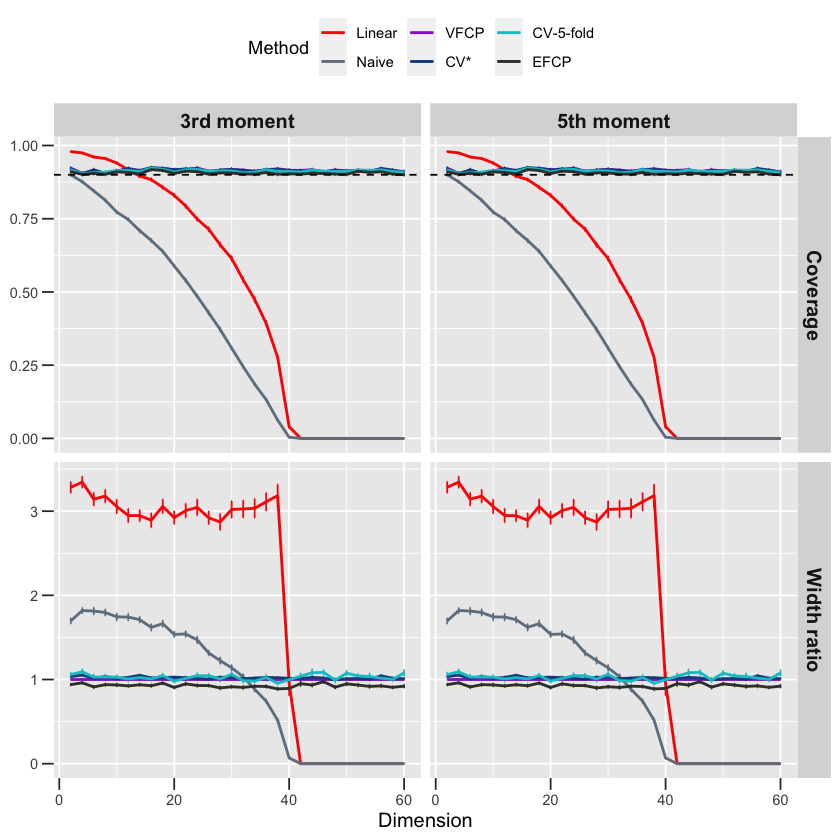

In [6]:
data_nonlinear_fm=rbind(cov,len)
dummy_coverage <- data.frame(Var=c("Coverage"),Z= 0.9)

ggplot_nonlinear_fm=ggplot(data=data_nonlinear_fm, aes(x=V1, y=V2, group=Method,color=Method)) +
  geom_errorbar(aes(ymin=V2-sd, ymax=V2+sd), width=.1)+
  geom_line(size = 0.8, aes(color=Method))+  #,linetype=Method)) +
  #geom_point(size=5, colour=bgnd)+
  #geom_point(aes(shape=Method,color=Method)) +
  theme(#axis.text.y = element_blank(), 
    #axis.ticks.y = element_blank(), 
    axis.title.y = element_blank(),
    #plot.title = element_text(size = 8,hjust=0.5),
    #axis.text = element_text(size = 10),
    #axis.title =element_text(size = 10),
    legend.position="top") +
  facet_grid(Var~Moment,scales = "free")+
  #scale_shape_manual(values=shape_manual) + 
  scale_color_manual(values=colors_manual) +
  #ylim(0,1.2) + #xlab("dim") + ylab("Avg-Len")  
  xlab("Dimension")+guides(shape=FALSE)+
  theme(strip.text.x = element_text(size = 12, face = "bold"), strip.text.y = element_text(size=12, face="bold"), axis.ticks.length=unit(.25, "cm"),axis.title=element_text(size=12))+ geom_hline(data=dummy_coverage, aes(yintercept=Z), linetype="dashed")
ggsave(("ggplot_nonlinear_fm.pdf"),ggplot_nonlinear_fm, width = 10, height = 10, units = "in")


ggplot_nonlinear_fm